In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import squarify

In [ ]:
df = pd.read_csv("../../data_original/Combined.csv")


<ipython-input-17-e19d38645074>:1: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/drive/MyDrive/Combined.csv")


{'arp', 'icmp', 'ipv6-icmp', 'llc', 'lldp', 'sctp', 'tcp', 'udp'}

In [ ]:
set(df['State'])

{'ACC', 'CON', 'ECO', 'FIN', 'INT', 'NRS', 'REQ', 'RSP', 'RST', 'TST', 'URP'}

In [ ]:
df.columns

Index(['Unnamed: 0', 'Seq', 'Dur', 'RunTime', 'Mean', 'Sum', 'Min', 'Max',
       'Proto', 'sTos', 'dTos', 'sDSb', 'dDSb', 'sTtl', 'dTtl', 'sHops',
       'dHops', 'Cause', 'TotPkts', 'SrcPkts', 'DstPkts', 'TotBytes',
       'SrcBytes', 'DstBytes', 'Offset', 'sMeanPktSz', 'dMeanPktSz', 'Load',
       'SrcLoad', 'DstLoad', 'Loss', 'SrcLoss', 'DstLoss', 'pLoss', 'SrcGap',
       'DstGap', 'Rate', 'SrcRate', 'DstRate', 'State', 'SrcWin', 'DstWin',
       'sVid', 'dVid', 'SrcTCPBase', 'DstTCPBase', 'TcpRtt', 'SynAck',
       'AckDat', 'Label', 'Attack Type', 'Attack Tool'],
      dtype='object')

In [ ]:
df

,Unnamed: 0,Seq,Dur,RunTime,Mean,Sum,Min,Max,Proto,sTos,...,sVid,dVid,SrcTCPBase,DstTCPBase,TcpRtt,SynAck,AckDat,Label,Attack Type,Attack Tool
0,0,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,icmp,0.0,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,Benign,Benign,Benign
1,1,2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,icmp,0.0,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,Benign,Benign,Benign
2,2,3,4.998020,4.998020,4.998020,4.998020,4.998020,4.998020,udp,0.0,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,Benign,Benign,Benign
3,3,4,4.998037,4.998037,4.998037,4.998037,4.998037,4.998037,udp,0.0,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,Benign,Benign,Benign
4,4,5,4.999453,4.999453,4.999453,4.999453,4.999453,4.999453,udp,0.0,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,Benign,Benign,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1215885,487569,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,sctp,186.0,...,610.0,NaN,NaN,NaN,0.0,0.0,0.0,Benign,Benign,Benign
1215886,487570,3,0.235607,0.235607,0.235607,0.235607,0.235607,0.235607,sctp,186.0,...,NaN,610.0,NaN,NaN,0.0,0.0,0.0,Benign,Benign,Benign
1215887,487571,764,0.099927,0.099927,0.099927,0.099927,0.099927,0.099927,tcp,0.0,...,NaN,NaN,2.237373e+09,1.983280e+09,0.0,0.0,0.0,Benign,Benign,Benign
1215888,487572,3,1.307852,1.307852,1.307852,1.307852,1.307852,1.307852,sctp,186.0,...,NaN,610.0,NaN,NaN,0.0,0.0,0.0,Benign,Benign,Benign


In [ ]:
df.nunique(axis=0)

Unnamed: 0      728316
Seq             137210
Dur             218694
RunTime         218694
Mean            218694
Sum             218694
Min             218694
Max             218694
Proto                8
sTos                12
dTos                 7
sDSb                12
dDSb                 6
sTtl                35
dTtl                33
sHops               27
dHops               26
Cause                3
TotPkts            572
SrcPkts            472
DstPkts            462
TotBytes         24614
SrcBytes         17540
DstBytes         10079
Offset         1118981
sMeanPktSz       21243
dMeanPktSz       15441
Load            230997
SrcLoad         226800
DstLoad         148712
Loss                24
SrcLoss             14
DstLoss             14
pLoss              170
SrcGap              15
DstGap              17
Rate            188573
SrcRate         171389
DstRate         142821
State               11
SrcWin            1087
DstWin            1085
sVid                 1
dVid       

In [ ]:
df2 = df.T.drop_duplicates().T
df2

,Unnamed: 0,Seq,Dur,Proto,sTos,dTos,sDSb,dDSb,sTtl,dTtl,...,sVid,dVid,SrcTCPBase,DstTCPBase,TcpRtt,SynAck,AckDat,Label,Attack Type,Attack Tool
0,0,1,0.0,icmp,0.0,NaN,cs0,NaN,58.0,NaN,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,Benign,Benign,Benign
1,1,2,0.0,icmp,0.0,NaN,cs0,NaN,58.0,NaN,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,Benign,Benign,Benign
2,2,3,4.99802,udp,0.0,0.0,cs0,cs0,117.0,64.0,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,Benign,Benign,Benign
3,3,4,4.998037,udp,0.0,0.0,cs0,cs0,117.0,64.0,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,Benign,Benign,Benign
4,4,5,4.999453,udp,0.0,0.0,cs0,cs0,117.0,64.0,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,Benign,Benign,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1215885,487569,1,0.0,sctp,186.0,186.0,ef,ef,252.0,255.0,...,610.0,NaN,NaN,NaN,0.0,0.0,0.0,Benign,Benign,Benign
1215886,487570,3,0.235607,sctp,186.0,40.0,ef,af11,255.0,250.0,...,NaN,610.0,NaN,NaN,0.0,0.0,0.0,Benign,Benign,Benign
1215887,487571,764,0.099927,tcp,0.0,0.0,cs0,cs0,64.0,114.0,...,NaN,NaN,2237372583.0,1983280118.0,0.0,0.0,0.0,Benign,Benign,Benign
1215888,487572,3,1.307852,sctp,186.0,40.0,ef,af11,255.0,250.0,...,NaN,610.0,NaN,NaN,0.0,0.0,0.0,Benign,Benign,Benign


In [ ]:
df2.columns

Index(['Unnamed: 0', 'Seq', 'Dur', 'Proto', 'sTos', 'dTos', 'sDSb', 'dDSb',
       'sTtl', 'dTtl', 'sHops', 'dHops', 'Cause', 'TotPkts', 'SrcPkts',
       'DstPkts', 'TotBytes', 'SrcBytes', 'DstBytes', 'Offset', 'sMeanPktSz',
       'dMeanPktSz', 'Load', 'SrcLoad', 'DstLoad', 'Loss', 'SrcLoss',
       'DstLoss', 'pLoss', 'SrcGap', 'DstGap', 'Rate', 'SrcRate', 'DstRate',
       'State', 'SrcWin', 'DstWin', 'sVid', 'dVid', 'SrcTCPBase', 'DstTCPBase',
       'TcpRtt', 'SynAck', 'AckDat', 'Label', 'Attack Type', 'Attack Tool'],
      dtype='object')

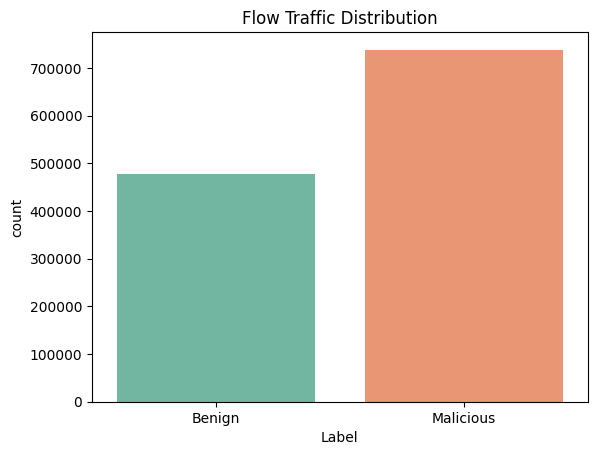

In [ ]:
sns.countplot(x='Label', hue='Label', data=df2, palette="Set2", legend=False)
plt.title('Flow Traffic Distribution')
plt.show()

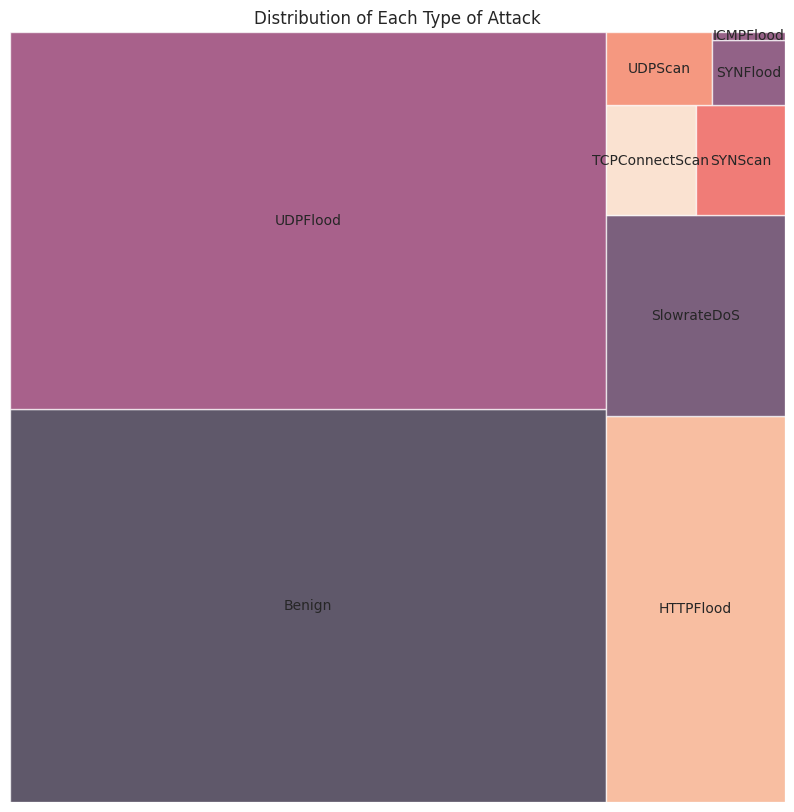

In [ ]:
sns.set_style(style="whitegrid") # set seaborn plot style
attack_counts = df2['Attack Type'].value_counts()# proportions of the categories
plt.figure(figsize=(10, 10))
squarify.plot(sizes=attack_counts.values, label=attack_counts.index, alpha=0.7).set(title='Distribution of Each Type of Attack')
plt.axis('off')
plt.show()

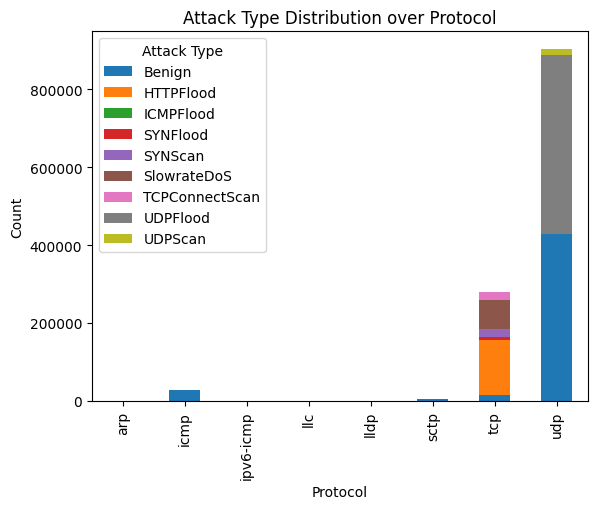

In [ ]:
attacks_by_protocol = df2.groupby('Proto')['Attack Type'].value_counts().unstack()

# Plotting
attacks_by_protocol.plot(kind='bar', stacked=True)
plt.xlabel('Protocol')
plt.ylabel('Count')
plt.title('Attack Type Distribution over Protocol')
plt.legend(title='Attack Type')
plt.show()

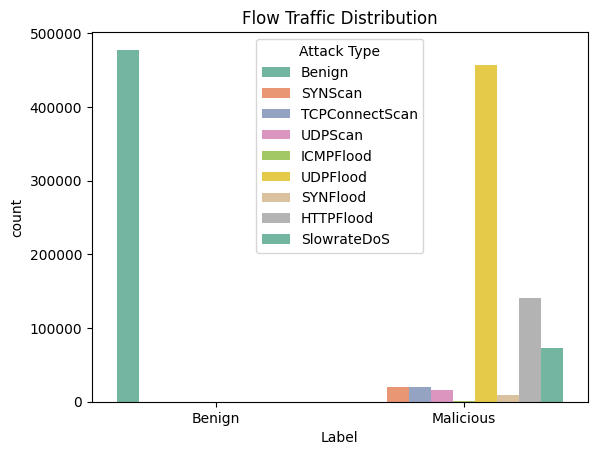

In [ ]:
sns.countplot(x='Label', hue='Attack Type', data=df2, palette="Set2", legend=True)
plt.title('Flow Traffic Distribution')
plt.show()